# Quick Tutorial

This tutorial will walk you through the basic usage of the Map Binning package, from installation to performing your first spatial resampling operation.

## Prerequisites

Before starting, make sure you have:
- Python 3.11 or higher
- Basic familiarity with xarray and NumPy
- Geospatial data in NetCDF or similar format

## Installation

Install the package using pip or conda:

```bash
# Using pip
pip install map-binning

# Using conda
conda install -c conda-forge map-binning
```

## Tutorial Overview

This tutorial covers:
1. Loading and preparing your data
2. Creating a binning instance
3. Generating binning indices
5. Saving and loading results
6. Working with time series data

## Step 1: Import Required Libraries

In [1]:
import numpy as np
import xarray as xr
import pandas as pd
from map_binning.binning import Binning
import matplotlib.pyplot as plt

## Step 2: Prepare Your Data

### Loading Sample Data

In [ ]:
# Load high-resolution dataset
ds_high = xr.open_dataset('path/to/high_resolution_data.nc')

# Load low-resolution target grid
ds_low = xr.open_dataset('path/to/low_resolution_grid.nc')

# Inspect your data
print("High-res shape:", ds_high.dims)
print("Low-res shape:", ds_low.dims)
print("Variables:", list(ds_high.data_vars))

### Creating Sample Data (for testing)

If you don't have real data, create sample datasets:

In [2]:
# Create high-resolution sample data
lon_high = np.linspace(-180, 180, 360)
lat_high = np.linspace(-90, 90, 180)
temp_high = 15 + 10 * np.random.randn(180, 360)

ds_high = xr.Dataset({
    'temperature': (['lat', 'lon'], temp_high)
}, coords={
    'lat': lat_high,
    'lon': lon_high
})

# Create low-resolution target grid
lon_low = np.linspace(-180, 180, 72)
lat_low = np.linspace(-90, 90, 36)
temp_low = np.zeros((36, 72))

ds_low = xr.Dataset({
    'temperature': (['lat', 'lon'], temp_low)
}, coords={
    'lat': lat_low,
    'lon': lon_low
})

print(f"High-res shape: {ds_high.temperature.shape}")
print(f"Low-res shape: {ds_low.temperature.shape}")

High-res shape: (180, 360)
Low-res shape: (36, 72)


## Step 3: Create Binning Instance and Perform Binning

In [3]:
# Initialize the binning object and perform mean binning
binning = Binning(ds_high, ds_low, var_name='temperature')
binned_data = binning.mean_binning()
print(binned_data)

print("Binning completed successfully!")

<xarray.DataArray 'temperature' (lat: 36, lon: 72)> Size: 21kB
array([[13.3042795 , 11.53859273, 15.80437025, ..., 19.71312768,
        14.90273384, 13.00921581],
       [14.56625884, 16.03148333, 14.09610106, ..., 17.67756804,
        15.55314108, 17.1652841 ],
       [17.98309721, 11.56056891, 13.62736233, ..., 15.05980309,
        14.1340006 , 13.59252558],
       ...,
       [16.30467488, 13.1947628 , 13.3315859 , ..., 16.53353208,
        14.60787581, 17.91352187],
       [16.10536433, 15.65703163, 17.96963997, ..., 17.73545128,
        12.44027826,  8.74816033],
       [12.36819868, 16.74928138, 18.51472747, ..., 14.34348608,
        13.54236051, 16.07894793]], shape=(36, 72))
Coordinates:
  * lat      (lat) float64 288B -90.0 -84.86 -79.71 -74.57 ... 79.71 84.86 90.0
  * lon      (lon) float64 576B -180.0 -174.9 -169.9 ... 169.9 174.9 180.0
Binning completed successfully!


### Using a Custom Search Radius

In [5]:
# You can also specify a custom search radius
binning_custom = Binning(
    ds_high=ds_high,
    ds_low=ds_low,
    var_name='temperature',
    search_radius=2.0  # Optional: search radius in degrees
)
binned_data_custom = binning_custom.mean_binning()
print(binned_data_custom)
print("Custom radius binning completed!")

<xarray.DataArray 'temperature' (lat: 36, lon: 72)> Size: 21kB
array([[12.28474658,  8.97465385, 12.37623381, ..., 15.20187659,
        11.33234582,  3.63739544],
       [13.82836437, 19.88594306, 13.6902113 , ..., 15.78901973,
        13.24408292, 19.96230165],
       [16.66200789, 10.77611789, 15.60902154, ..., 18.23007265,
        17.37942166, 14.30331607],
       ...,
       [15.80872501, 13.084777  ,  8.46253214, ..., 17.14998467,
        12.45652932, 22.0159084 ],
       [20.10954122, 16.1350205 , 19.61472726, ..., 18.8565694 ,
        16.81963304,  3.14892109],
       [ 7.62850204, 10.14262116, 20.51282922, ..., 15.34091617,
        12.50375306, 14.81456931]], shape=(36, 72))
Coordinates:
  * lat      (lat) float64 288B -90.0 -84.86 -79.71 -74.57 ... 79.71 84.86 90.0
  * lon      (lon) float64 576B -180.0 -174.9 -169.9 ... 169.9 174.9 180.0
Custom radius binning completed!


## Step 4: Perform Additional Binning Operations

### Using Precomputed Binning Index for Better Performance

For multiple operations on the same grids, you can use precomputed indices:

In [6]:
# Create a binning index for reuse
binning = Binning(ds_high, ds_low, var_name='temperature')
index = binning.create_binning_index()

# Now use the precomputed index for faster binning
result_with_index = binning.mean_binning(precomputed_binning_index=index)
print("Binning with precomputed index completed!")

Binning with precomputed index completed!


## Step 5: Visualize Results

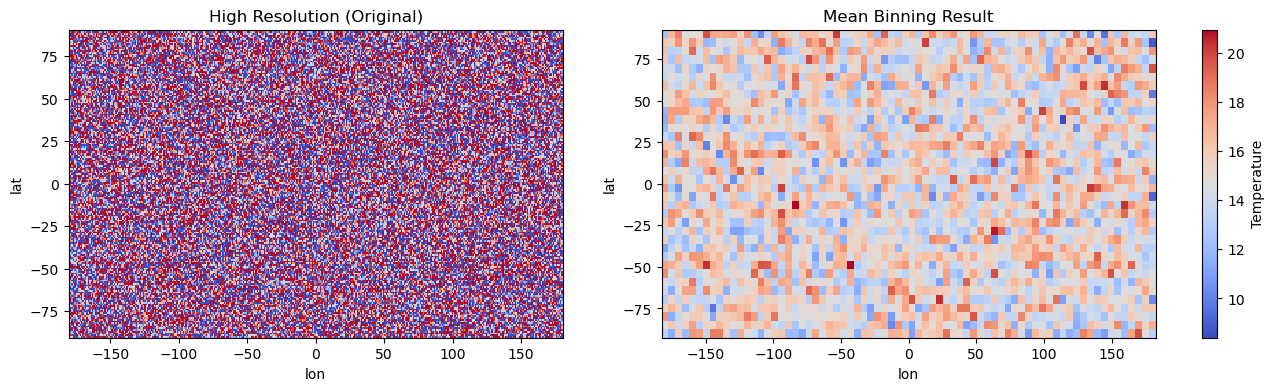

In [12]:
# Ensure both plots use the same color scale and add a single colorbar
vmin = max(ds_high.temperature.min().item(), binned_data.min().item())
vmax = min(ds_high.temperature.max().item(), binned_data.max().item())

# Plot original high-resolution data
fig, axes = plt.subplots(1, 2, figsize=(15, 4))

ds_high.temperature.plot(ax=axes[0], cmap='coolwarm', vmin=vmin, vmax=vmax, add_colorbar=False)
axes[0].set_title('High Resolution (Original)')
binned_data.plot(ax=axes[1], cmap='coolwarm', vmin=vmin, vmax=vmax, add_colorbar=False)
axes[1].set_title('Mean Binning Result')

# Add a single colorbar for both plots
fig.colorbar(axes[1].collections[0], ax=axes, orientation='vertical', fraction=0.025, pad=0.04, label='Temperature')

plt.show()

## Step 6: Save and Load Binning Index

### Saving for Reuse

In [14]:
# Save the binning index for future use
from map_binning.index_store import save, load

# First create the index
binning = Binning(ds_high, ds_low, var_name='temperature')
index = binning.create_binning_index()

# Save the binning index
save(index, 'temperature_binning_index.pkl')
print("Binning index saved!")

# Save the results
binned_data.to_netcdf('temperature_mean_binned.nc')
print("Results saved!")

Binning index saved!
Results saved!


### Loading Previously Saved Index

In [15]:
# Load the saved binning index
loaded_index = load('temperature_binning_index.pkl')
print("Binning index loaded!")

# Use the loaded index for new binning operations
binning = Binning(ds_high, ds_low, var_name='temperature')
new_result = binning.mean_binning(precomputed_binning_index=loaded_index)
print("Binning with loaded index completed!")

Binning index loaded!
Binning with loaded index completed!


## Step 7: Working with Time Series

When working with time series data, you can perform binning across all time steps in one operation if your data is structured with a `time` dimension. The `Binning` class will automatically handle the time dimension and apply the mean binning method to each time slice:

In [18]:
# If your high-resolution dataset has a 'time' dimension,
# you can bin the entire time series at once.
# For demonstration, let's create a time series dataset

# Create sample time series data
times = pd.date_range('2020-01-01', periods=12, freq='ME')
temp_timeseries = np.random.randn(12, 180, 360) + 15

ds_high_timeseries = xr.Dataset({
    'temperature': (['time', 'lat', 'lon'], temp_timeseries)
}, coords={
    'time': times,
    'lat': lat_high,
    'lon': lon_high
})

# Perform binning on the entire time series
binning_ts = Binning(ds_high_timeseries, ds_low, var_name='temperature')
result_timeseries = binning_ts.mean_binning()
print("Time series binning completed!")
print(f"Result shape: {result_timeseries.shape}")

Time series binning completed!
Result shape: (12, 36, 72)


## Best Practices

### Performance Tips

1. **Reuse binning indices**: Create the index once and reuse it for multiple variables or time steps
2. **Choose appropriate radius**: Smaller radius = more precise but potentially more gaps
3. **Memory management**: For large datasets, consider processing in chunks

In [19]:
# Example of performance comparison
import time

# Method 1: Without precomputed index (slower)
start_time = time.time()
binning1 = Binning(ds_high, ds_low, var_name='temperature')
result1 = binning1.mean_binning()
time_without_index = time.time() - start_time

# Method 2: With precomputed index (faster for multiple operations)
start_time = time.time()
binning2 = Binning(ds_high, ds_low, var_name='temperature')
index = binning2.create_binning_index()
result2 = binning2.mean_binning(precomputed_binning_index=index)
time_with_index = time.time() - start_time

print(f"Time without precomputed index: {time_without_index:.3f} seconds")
print(f"Time with precomputed index: {time_with_index:.3f} seconds")

Time without precomputed index: 1.165 seconds
Time with precomputed index: 0.187 seconds


## Next Steps

Now that you've completed the basic tutorial, you can:

1. Explore the [API Reference](../api_reference.md) for advanced features
2. Check out more complex examples with real-world data
3. Learn about optimization techniques for large datasets
4. Integrate Map Binning into your analysis workflows

## Troubleshooting

### Common Issues

**Issue**: "No points found within radius"
- **Solution**: Increase the search radius or check coordinate system compatibility

**Issue**: "Memory error with large datasets"
- **Solution**: Process data in smaller chunks or increase system memory

**Issue**: "Inconsistent coordinate systems"
- **Solution**: Ensure both datasets use the same coordinate reference system

For more help, check the project's GitHub issues or documentation.